# Understanding Decision Trees and Cost Complexity Pruning

### Table of contents
1. Intuition behind decision trees
2. Attribute selection measures 
   > Information Gain <br>
   > Gini Index<br>
3. Training Model using both
4. Accuracy and Confusion Matrix
3. Overfitting in Decision Trees 
4. Different Methods to Reduce Overfitting
5. Cost Complexity Pruning


## Intuition behind a decision tree
<font size="4"> The basic intuition behind a decision tree is to map out all possible decision paths in the form of a tree. Each path from the root to a leaf of the tree signifies a decision process

## Attribute selection measures / Splitting Rules
### Information gain 
<font size="3"> It is used for deciding the best features/attributes that render maximum data about a class. It follows the method of entropy while aiming at reducing the level of entropy, starting from the root node to the leaf nodes.
    Information gain is calculated by comparing the entropy of the dataset before and after a transformation.    


### Gini Impurity
<font size="3">The Gini impurity is used to predict the likelihood that a randomly selected example would be incorrectly classified by a specific node


<div>
    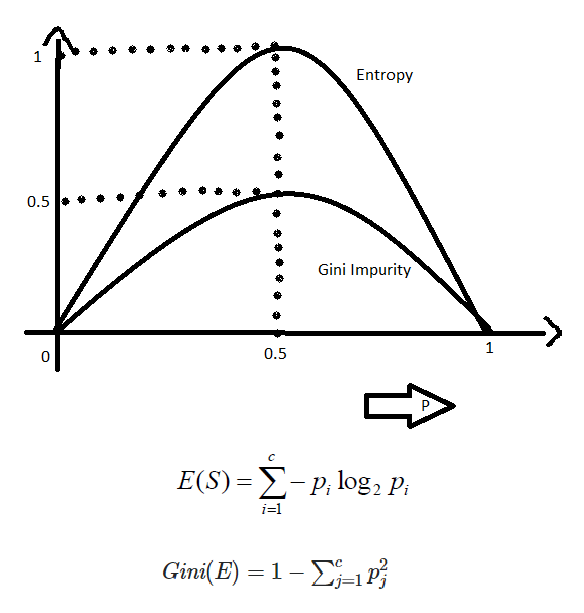
</div>

<font size="2"> The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.

#### Import Library 

In [440]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset 

I have used Breast Cancer Dataset from sklearn, it has over 20 variables and 6000 datapoints which basically makes it easier see various parametric changes that we can make in data

#### Build and fit Decision Tree 

In [424]:
iris = load_breast_cancer()

X = iris.data
y = iris.target

In [425]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=0)

In [426]:
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(x_train,y_train)
a= clf.predict(x_train)
b = clf.predict(x_test)
# a = y_train_pred
#b = y_test_pred

Note : Gini Impurity is the default selection of criterion in decision trees thus we did not need to set it above but for entropy we have to set the criterion to entropy. moreover, I have used here max_depth and min_samples_leaf which are basically tunes to reduce overfitting, we can use different methods for the same for instance I will be using pruning in the end of this notebook.

In [427]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
clf1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

#### Plotting the Decision Tree  

Decision Tree for the Gini Impurity Case


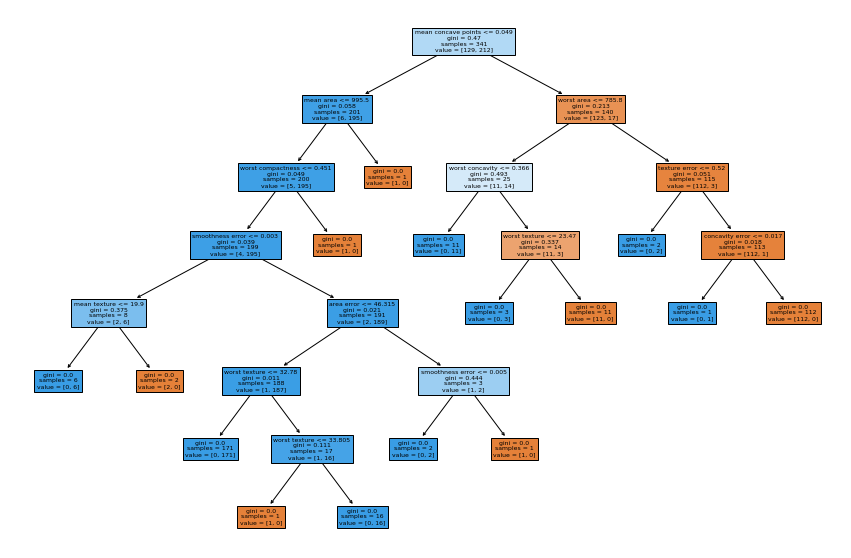

In [428]:
print('Decision Tree for the Gini Impurity Case')
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf,ax=ax,feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], filled = True)

plt.show()

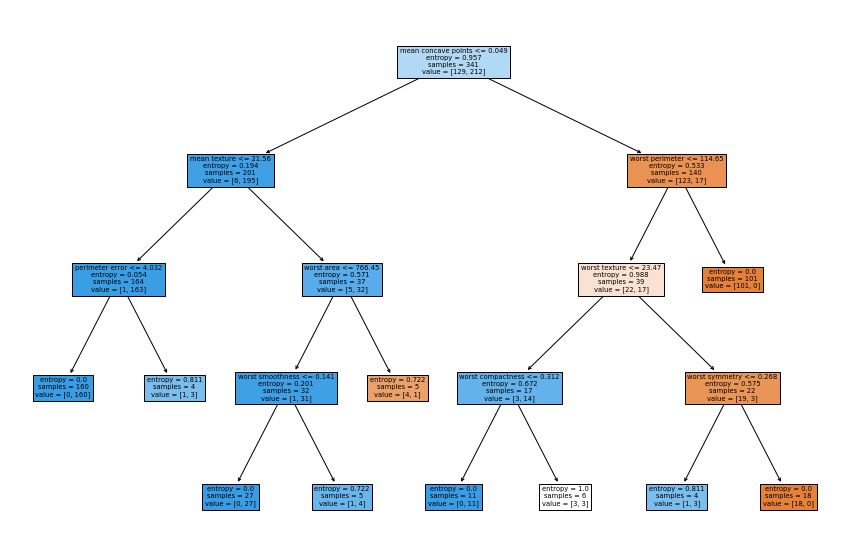

In [429]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf1,ax=ax,feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], filled = True)

plt.show()

### Plotting Confusion Matrix 

In [430]:
from sklearn.metrics import plot_confusion_matrix

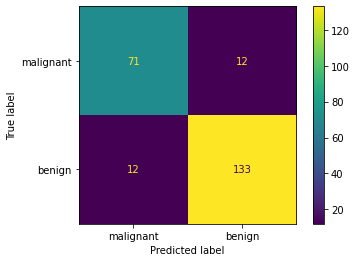

In [431]:
plot_confusion_matrix(clf, x_test, y_test, display_labels = ['malignant', 'benign'])

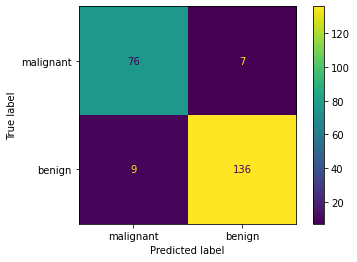

In [432]:
plot_confusion_matrix(clf1, x_test, y_test, display_labels = ['malignant', 'benign'])

# Accuracy

In [437]:
nr_correct = (y_train ==clf.predict(x_train) ).sum()
nr_incorrect = (y_train !=clf.predict(x_train) ).sum()
nr_incorr = y_train.size - nr_correct

nr = nr_incorr/(nr_incorr+nr_correct)
print( f'The Accuracy of this training model is {1-nr:.02%}')
nr_correct = (y_test ==clf.predict(x_test) ).sum()
nr_incorrect = (y_test !=clf.predict(x_test) ).sum()
nr_incorr = y_test.size - nr_correct

nr = nr_incorr/(nr_incorr+nr_correct)
print( f'The Accuracy of this test model is {1-nr:.02%}')

The Accuracy of this training model is 100.00%
The Accuracy of this test model is 89.47%


In [438]:
nr_correct = (y_train ==clf1.predict(x_train) ).sum()
nr_incorrect = (y_train !=clf1.predict(x_train) ).sum()
nr_incorr = y_train.size - nr_correct

nr = nr_incorr/(nr_incorr+nr_correct)
print( f'The Accuracy of this training model is {1-nr:.02%}')
nr_correct = (y_test ==clf1.predict(x_test) ).sum()
nr_incorrect = (y_test !=clf1.predict(x_test) ).sum()
nr_incorr = y_test.size - nr_correct

nr = nr_incorr/(nr_incorr+nr_correct)
print( f'The Accuracy of this test model is {1-nr:.02%}')

The Accuracy of this training model is 97.95%
The Accuracy of this test model is 92.98%


### Clearly, the model trained using gini ASM is giving us more inaccurate model, also, that model is overfitting the data
#### now, let's look at that model again

[Text(0.5454545454545454, 0.9375, 'X[7] <= 0.049\ngini = 0.47\nsamples = 341\nvalue = [129, 212]'),
 Text(0.3939393939393939, 0.8125, 'X[3] <= 995.5\ngini = 0.058\nsamples = 201\nvalue = [6, 195]'),
 Text(0.3333333333333333, 0.6875, 'X[25] <= 0.451\ngini = 0.049\nsamples = 200\nvalue = [5, 195]'),
 Text(0.2727272727272727, 0.5625, 'X[14] <= 0.003\ngini = 0.039\nsamples = 199\nvalue = [4, 195]'),
 Text(0.12121212121212122, 0.4375, 'X[1] <= 19.9\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.06060606060606061, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.18181818181818182, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42424242424242425, 0.4375, 'X[13] <= 46.315\ngini = 0.021\nsamples = 191\nvalue = [2, 189]'),
 Text(0.30303030303030304, 0.3125, 'X[21] <= 32.78\ngini = 0.011\nsamples = 188\nvalue = [1, 187]'),
 Text(0.24242424242424243, 0.1875, 'gini = 0.0\nsamples = 171\nvalue = [0, 171]'),
 Text(0.36363636363636365, 0.1875, 'X[21] <= 33.805\ngini = 0.

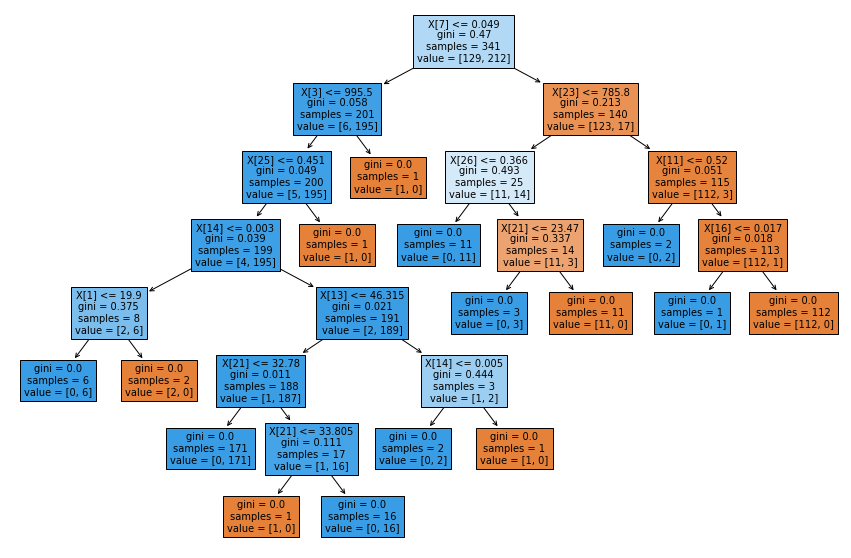

In [435]:
from sklearn import tree
plt.figure(figsize =(15,10))
tree.plot_tree(clf, filled = True)


<font size ='4'> This model has more depth, which can be a cause of this model to overfit, where the model we trained using entropy has limit for max depth and min sample leaf nodes. 
Now , to tune that parameter we can use pruning.

### What is Pruning? 
<font size="3">Pruning is a technique that is used to reduce overfitting. Pruning also simplifies a decision tree by removing the weakest rules. Essentially, pruning recursively finds the node with the “weakest link.” The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 

###### Cost Complexity Pruning Alphas http://mlwiki.org/index.php/Cost-Complexity_Pruning 



<div>
    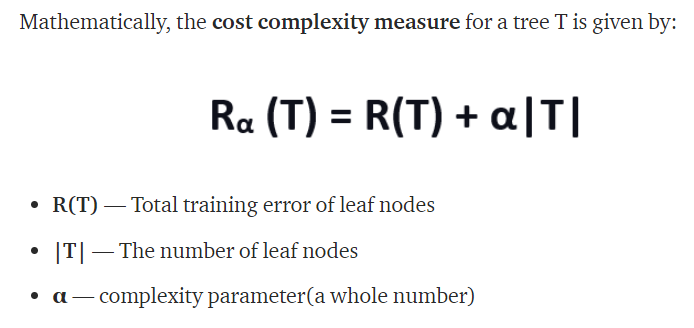
    
 </div>

In [396]:
ccp_alphas= clf.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']

In [397]:
ccp_alphas

array([0.        , 0.00290184, 0.00563319, 0.0058132 , 0.0113231 ,
       0.01382488, 0.02230415, 0.03433417, 0.34863814])

In [333]:
clf_dts = []#created an array that we put decision tree into

for ccp_alpha in ccp_alphas :
    clf=DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    clf_dts.append(clf) 

In [334]:
train_scores= [ clf.score(x_train, y_train ) for  clf in clf_dts]
test_scores = [clf.score(x_test, y_test) for clf in clf_dts]

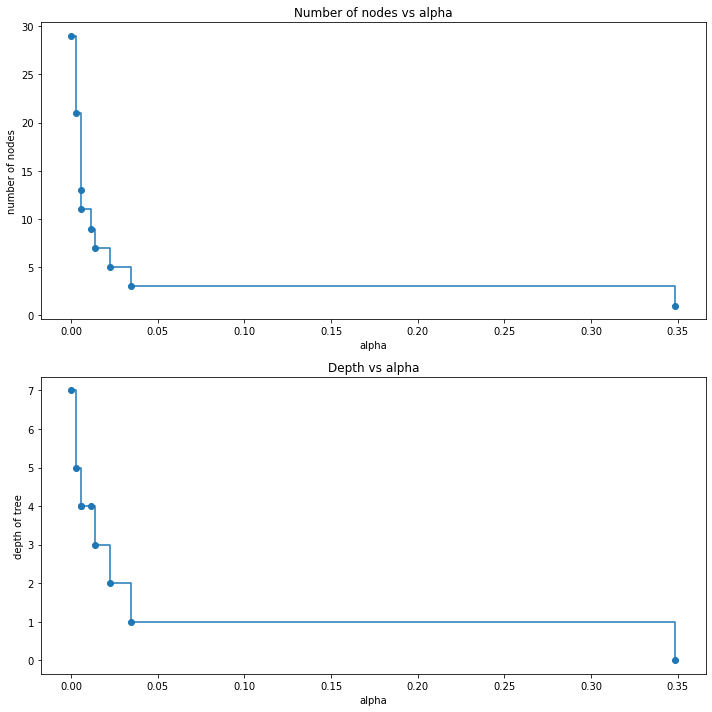

In [451]:
node_counts = [clf.tree_.node_count for clf in clf_dts]
depth = [clf.tree_.max_depth for clf in clf_dts]
fig, ax = plt.subplots(2, 1, figsize =(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

<font size ='4'>The plot shows that with the zero value of effective alpha the tree generated has the highest number of nodes and is the deepest(grows to the maximum), while as the effective alpha increases the trees are more pruned and have relatively fewer nodes and less deeper.

We get the list of train and test mean accuracy scores for each of the (remaining) trees and check how train/test accuracy scores change w.r.t the change in ccp_alpha.

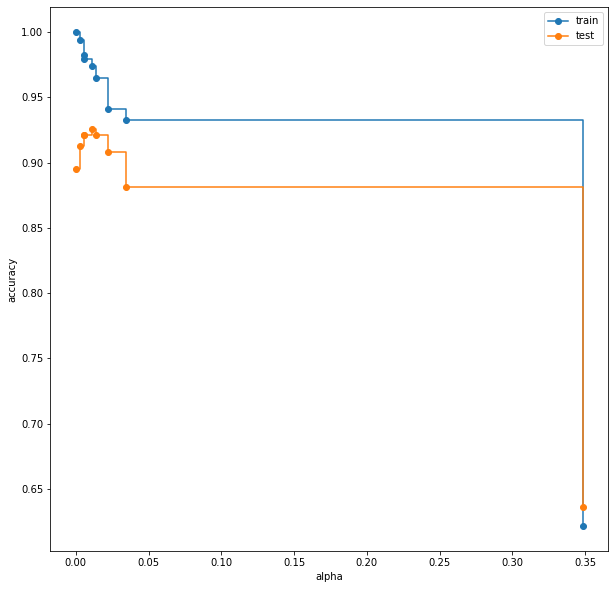

In [399]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.plot(ccp_alphas, train_scores, marker = 'o' , label='train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o' , label='test', drawstyle = 'steps-post')

ax.legend()
plt.show()

<font size ="4">With the initial smaller values of alpha, there is a huge disparity between the training and test accuracy scores. When the alpha value increases, the training accuracy decreases, and the test accuracy increases until we reach the optimal point(highest test accuracy score). In the plot, the optimal point lies between 0 to 0.005 of alpha, where we get the optimal pruned tree. Beyond this point with an increase in alpha, the tree is over pruned. This eventually leads to under-fitting, both the training and test accuracy scores decrease.

In [406]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01182488)
clf.fit(x_train,y_train)
a= clf.predict(x_train)
b = clf.predict(x_test)
#scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
#print(scores)

In [407]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,b )

0.9254385964912281

[Text(0.4, 0.875, 'X[7] <= 0.049\ngini = 0.47\nsamples = 341\nvalue = [129, 212]'),
 Text(0.2, 0.625, 'gini = 0.058\nsamples = 201\nvalue = [6, 195]'),
 Text(0.6, 0.625, 'X[23] <= 785.8\ngini = 0.213\nsamples = 140\nvalue = [123, 17]'),
 Text(0.4, 0.375, 'X[26] <= 0.366\ngini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.125, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.8, 0.375, 'gini = 0.051\nsamples = 115\nvalue = [112, 3]')]

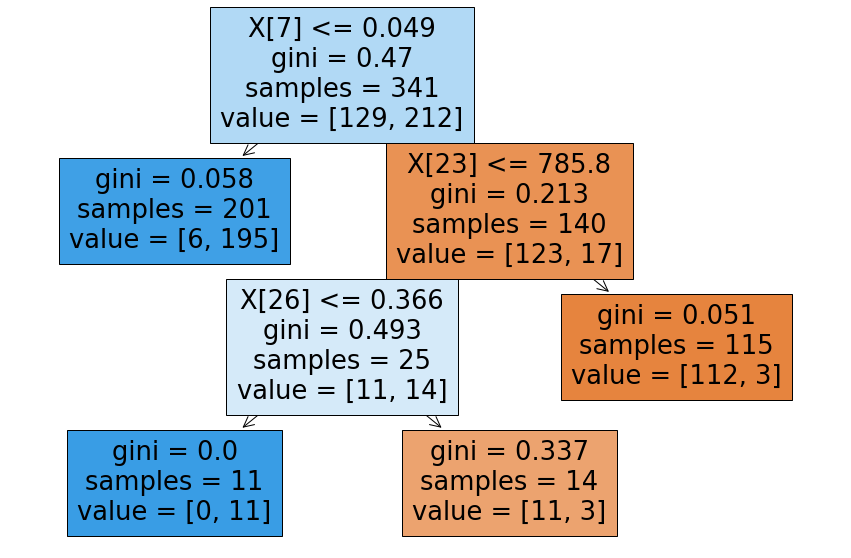

In [355]:
from sklearn import tree
plt.figure(figsize =(15,10))
tree.plot_tree(clf, filled = True)

Basically depth is controlled

set the values of min_samples_leaf,  max_deapth

<font size ='4'>Compared to the baseline model, certainly the difference between the training and test accuracy scores is lower. We can infer that over-fitting in the model has been reduced using post-pruning.